# AI6127 Deep Learning for Natural Language Processing

## Chen Yongquan (G2002341D)

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

### 1a)

In [2]:
d_model = 512 # Feature dimension for each token
nhead = 8 # Number of heads

# Key and value representation size,
# implied in nn.functional.multi_head_attention_forward by
# head_dim = embed_dim // num_heads
# https://github.com/pytorch/pytorch/blob/0a81034dd09c911c1ef81c22b44a9c527f9db061/torch/nn/functional.py#L4760
d_k = (int) (d_model / nhead) 
                              
dim_feedforward = 1024 # Hidden representation size of the feed-forward layer

In [3]:
one_layer_encoder =  torch.nn.TransformerEncoderLayer(d_model = d_model, nhead = nhead, dim_feedforward = dim_feedforward)

In [4]:
def model_params(model, detailed = True):
  param_total = 0
  for key in model.state_dict():
    param_total += model.state_dict()[key].nelement()
    if detailed:
      print(key + ':\n'
        + str(model.state_dict()[key].shape)
        + '\nParameters:'
        + str(model.state_dict()[key].nelement())
        + '\n')
  
  print('Total parameters: ' + str(param_total) + '\n')
  return param_total

param_total = model_params(one_layer_encoder)

self_attn.in_proj_weight:
torch.Size([1536, 512])
Parameters:786432

self_attn.in_proj_bias:
torch.Size([1536])
Parameters:1536

self_attn.out_proj.weight:
torch.Size([512, 512])
Parameters:262144

self_attn.out_proj.bias:
torch.Size([512])
Parameters:512

linear1.weight:
torch.Size([1024, 512])
Parameters:524288

linear1.bias:
torch.Size([1024])
Parameters:1024

linear2.weight:
torch.Size([512, 1024])
Parameters:524288

linear2.bias:
torch.Size([512])
Parameters:512

norm1.weight:
torch.Size([512])
Parameters:512

norm1.bias:
torch.Size([512])
Parameters:512

norm2.weight:
torch.Size([512])
Parameters:512

norm2.bias:
torch.Size([512])
Parameters:512

Total parameters: 2102784



In [5]:
param_total = []
for i in range(1,13):
  d_model_new = d_model
  for j in range(3):
    one_layer_encoder =  torch.nn.TransformerEncoderLayer(d_model = d_model_new, nhead = nhead, dim_feedforward = dim_feedforward)
    model = torch.nn.TransformerEncoder(one_layer_encoder, i)
    print(i, d_model_new)
    param_total.append([i, d_model_new, model_params(model, False)])
    d_model_new *= 2
param_total = np.array(param_total)

1 512
Total parameters: 2102784

1 1024
Total parameters: 6301696

1 2048
Total parameters: 20990976

2 512
Total parameters: 4205568

2 1024
Total parameters: 12603392

2 2048
Total parameters: 41981952

3 512
Total parameters: 6308352

3 1024
Total parameters: 18905088

3 2048
Total parameters: 62972928

4 512
Total parameters: 8411136

4 1024
Total parameters: 25206784

4 2048
Total parameters: 83963904

5 512
Total parameters: 10513920

5 1024
Total parameters: 31508480

5 2048
Total parameters: 104954880

6 512
Total parameters: 12616704

6 1024
Total parameters: 37810176

6 2048
Total parameters: 125945856

7 512
Total parameters: 14719488

7 1024
Total parameters: 44111872

7 2048
Total parameters: 146936832

8 512
Total parameters: 16822272

8 1024
Total parameters: 50413568

8 2048
Total parameters: 167927808

9 512
Total parameters: 18925056

9 1024
Total parameters: 56715264

9 2048
Total parameters: 188918784

10 512
Total parameters: 21027840

10 1024
Total parameters: 630

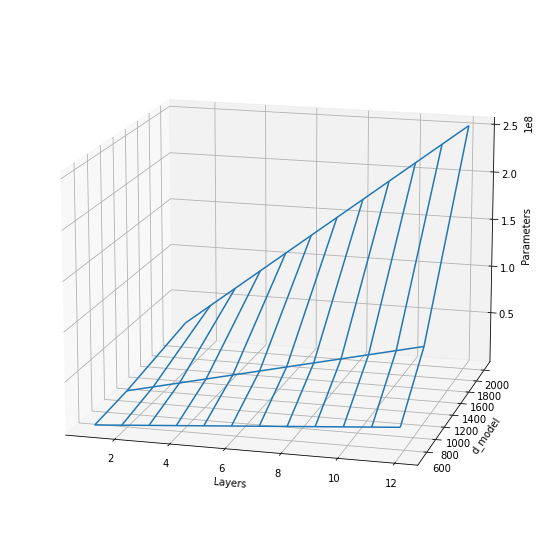

In [6]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_wireframe(param_total[:, 0].reshape(12,3), param_total[:, 1].reshape(12,3), param_total[:, 2].reshape(12,3))
ax.view_init(15,285)
ax.set_xlabel('Layers')
ax.set_ylabel('d_model')
ax.set_zlabel('Parameters');